In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 


In [3]:
dt=pd.read_csv(r"C:\Users\user\Downloads\steel plate fault prediction data.csv")
print(dt)

      X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0            42         50     270900     270944           267           17   
1           645        651    2538079    2538108           108           10   
2           829        835    1553913    1553931            71            8   
3           853        860     369370     369415           176           13   
4          1289       1306     498078     498335          2409           60   
...         ...        ...        ...        ...           ...          ...   
1936        249        277     325780     325796           273           54   
1937        144        175     340581     340598           287           44   
1938        145        174     386779     386794           292           40   
1939        137        170     422497     422528           419           97   
1940       1261       1281      87951      87967           103           26   

      Y_Perimeter  Sum_of_Luminosity  Minimum_of_Lu

<AxesSubplot:>

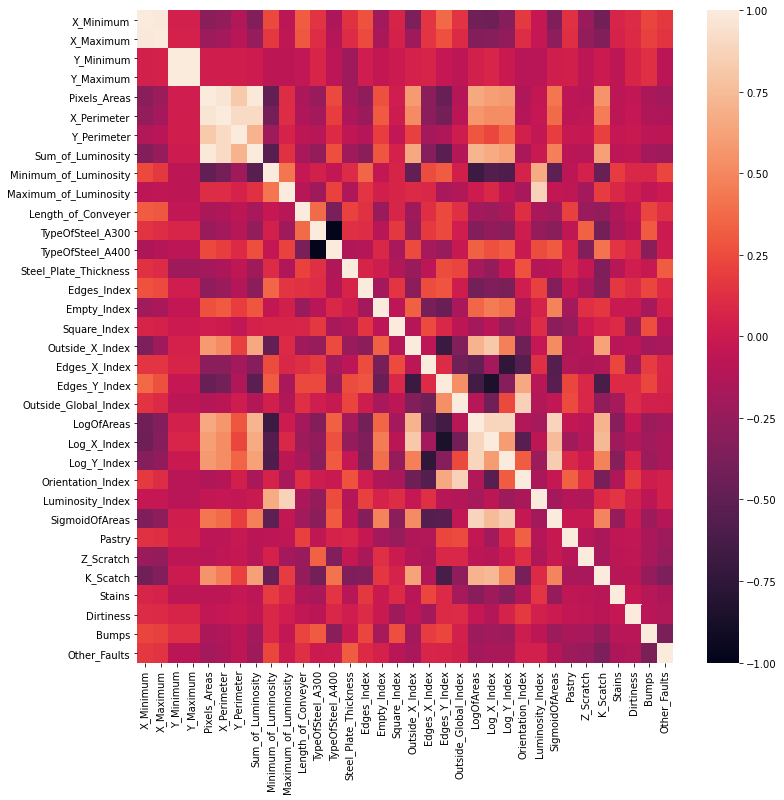

In [10]:
plt.figure(figsize=(12, 12))

#sns.heatmap(df)
sns.heatmap(dt.corr())

In [3]:
from sklearn.decomposition import PCA

In [7]:
label_columns=dt.columns.values[-7:]
targets=(dt.iloc[:,-7:]==1).idxmax(1)
dataset=dt.drop(label_columns,axis=1)
dataset['target']=targets

In [8]:
print(dataset)

      X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0            42         50     270900     270944           267           17   
1           645        651    2538079    2538108           108           10   
2           829        835    1553913    1553931            71            8   
3           853        860     369370     369415           176           13   
4          1289       1306     498078     498335          2409           60   
...         ...        ...        ...        ...           ...          ...   
1936        249        277     325780     325796           273           54   
1937        144        175     340581     340598           287           44   
1938        145        174     386779     386794           292           40   
1939        137        170     422497     422528           419           97   
1940       1261       1281      87951      87967           103           26   

      Y_Perimeter  Sum_of_Luminosity  Minimum_of_Lu

In [10]:
dataset.shape

(1941, 28)

In [11]:
dataset.head(4)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry


In [12]:
describe=dataset.describe().T
describe['skew']=dataset.skew().values
describe['kurtosis']=dataset.kurt().values
describe=round(describe, 2)
describe

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
X_Minimum,1941.0,571.14,520.69,0.00,51.00,435.00,1053.00,1705.00,0.50,-1.15
X_Maximum,1941.0,617.96,497.63,4.00,192.00,467.00,1072.00,1713.00,0.52,-1.08
Y_Minimum,1941.0,1650684.87,1774578.41,6712.00,471253.00,1204128.00,2183073.00,12987661.00,2.81,11.36
Y_Maximum,1941.0,1650738.71,1774590.09,6724.00,471281.00,1204136.00,2183084.00,12987692.00,2.81,11.36
Pixels_Areas,1941.0,1893.88,5168.46,2.00,84.00,174.00,822.00,152655.00,14.08,375.84
X_Perimeter,1941.0,111.86,301.21,2.00,15.00,26.00,84.00,10449.00,21.54,715.96
Y_Perimeter,1941.0,82.97,426.48,1.00,13.00,25.00,83.00,18152.00,39.29,1663.05
Sum_of_Luminosity,1941.0,206312.15,512293.59,250.00,9522.00,19202.00,83011.00,11591414.00,7.73,131.50
Minimum_of_Luminosity,1941.0,84.55,32.13,0.00,63.00,90.00,106.00,203.00,-0.11,0.11
Maximum_of_Luminosity,1941.0,130.19,18.69,37.00,124.00,127.00,140.00,253.00,1.29,7.86


In [13]:
dataset['target'].describe()

count             1941
unique               7
top       Other_Faults
freq               673
Name: target, dtype: object

In [14]:
print(dataset['target'].value_counts())

Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: target, dtype: int64


<AxesSubplot:ylabel='target'>

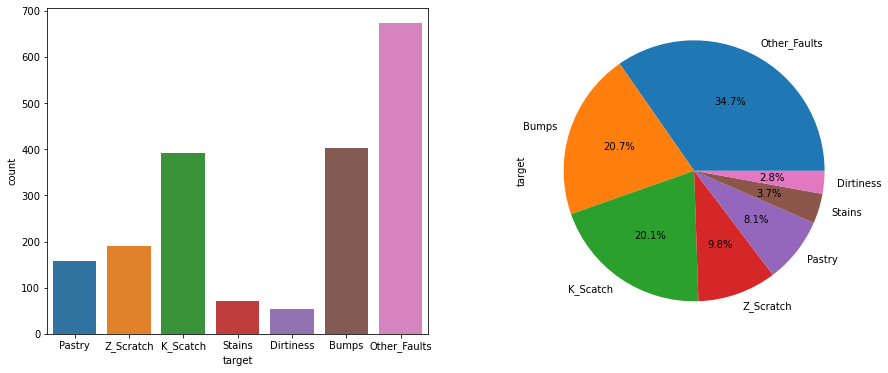

In [36]:
fig, ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x='target', data=dataset, ax=ax[0])
dataset['target'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

In [35]:
def get_train_test(dataset):
    
    X=dataset.drop('target', axis=1)
    y=dataset['target']
    standardScaler=StandardScaler()
    X=standardScaler.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X,
                                                     y, 
                                                     stratify=y,
                                                     test_size = 0.3,
                                                     random_state = 42)
    return X_train,X_test,y_train,y_test

In [21]:
X_train,X_test,y_train,y_test=get_train_test(dataset)

In [22]:
pca=PCA(whiten=True)
pca.fit(X_train)

PCA(whiten=True)

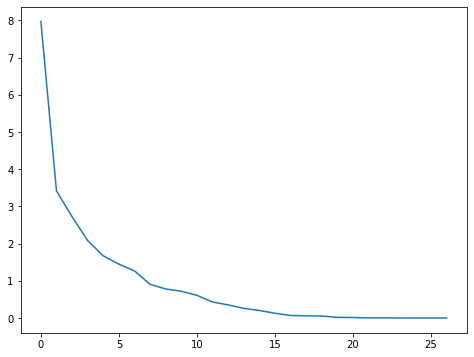

In [23]:
plt.figure(figsize=(8,6))
plt.plot(pca.explained_variance_)

In [24]:
pca=PCA(n_components=15)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [25]:
clf=SVC()
clf.fit(X_train_pca, y_train)
y_pred=clf.predict(X_test_pca)

In [27]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d") 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

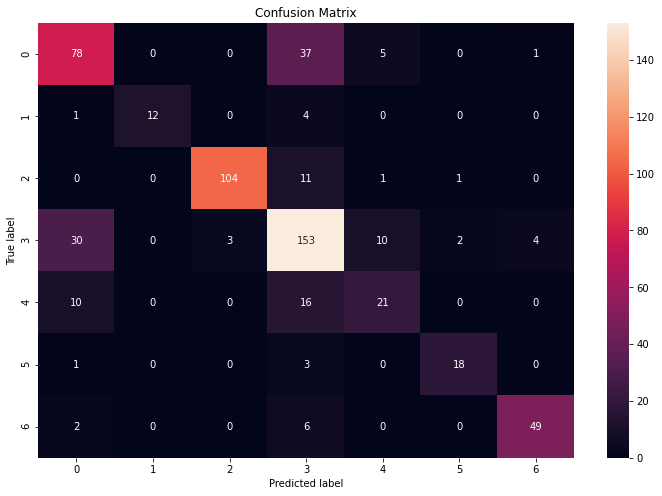

success rate:0.75
Classification Report: 
               precision    recall  f1-score   support

       Bumps       0.64      0.64      0.64       121
   Dirtiness       1.00      0.71      0.83        17
    K_Scatch       0.97      0.89      0.93       117
Other_Faults       0.67      0.76      0.71       202
      Pastry       0.57      0.45      0.50        47
      Stains       0.86      0.82      0.84        22
   Z_Scratch       0.91      0.86      0.88        57

    accuracy                           0.75       583
   macro avg       0.80      0.73      0.76       583
weighted avg       0.75      0.75      0.75       583



In [28]:
cm = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm)
print("success rate:{:.2f}".format(clf.score(X_test_pca,y_test)))
print('Classification Report: \n',classification_report(y_test,y_pred))

# #Random Forest Classifier

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [29]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
x= dataset.loc[:,dataset.columns != 'target'] 
y= dataset.loc[:,'target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [32]:
trees = np.arange(1, 50)
train_accuracy = []
test_accuracy = []
for i, k in enumerate(trees):
    # k from 1 to 27(exclude)
    rf = RandomForestClassifier(random_state = 10, n_estimators=k, min_samples_split=2)
    rf.fit(x_train,y_train)
    train_accuracy.append(rf.score(x_train, y_train))
    test_accuracy.append(rf.score(x_test, y_test))

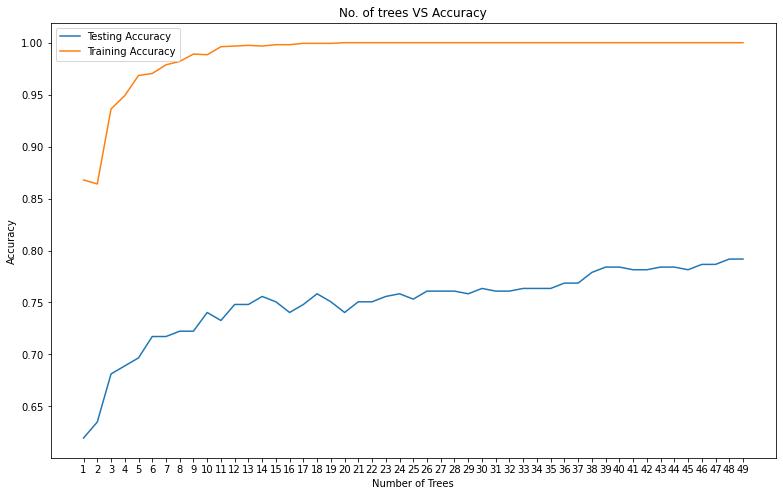

In [34]:

plt.figure(figsize=[13,8])
plt.plot(trees, test_accuracy, label = 'Testing Accuracy')
plt.plot(trees, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('No. of trees VS Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.xticks(trees)
plt.show()

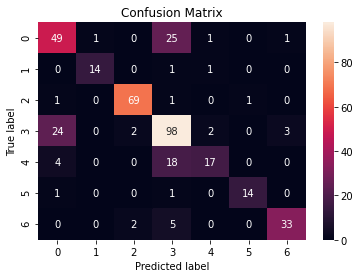

Classification report: 
               precision    recall  f1-score   support

       Bumps       0.62      0.64      0.63        77
   Dirtiness       0.93      0.88      0.90        16
    K_Scatch       0.95      0.96      0.95        72
Other_Faults       0.66      0.76      0.71       129
      Pastry       0.81      0.44      0.57        39
      Stains       0.93      0.88      0.90        16
   Z_Scratch       0.89      0.82      0.86        40

    accuracy                           0.76       389
   macro avg       0.83      0.77      0.79       389
weighted avg       0.77      0.76      0.75       389

Best accuracy is 0.7917737789203085 with No. of trees = 48


In [33]:
rf = RandomForestClassifier(random_state = 8, n_estimators=48, min_samples_split=2)
y_pred = rf.fit(x_train,y_train).predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d") 
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('Classification report: \n',classification_report(y_test,y_pred))
print("Best accuracy is {} with No. of trees = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))